# Problème Karm Bandit
### Cours A59 : renforcement par apprentissage
### F. Mulotti

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class karm():
    __version__ = "1.1"
    def __init__(self,k,seed,epsilon, sigma ,initial_value):
        np.random.seed(seed)
        # nombre de bras
        self.k=k
        
        # e-greedy
        self.epsilon = epsilon

        # initialisation des moyennes des k bras
        self.mu      = np.random.normal(size=self.k)
        
        # ecart type pour chaque bras
        self.sigma   = np.full((self.k),sigma)

        self.initial_value = initial_value
        
        # Initialisation 
        self.init_tableau()
    
    def version(self):
        #renvoie la version du code
        return self.__version__
    
    
    def init_tableau(self):
        # comptage du nombre de fois qu'un bras est actionné
        self.n=np.zeros((self.k))
        # init de la récompense par bras
        self.Reward=np.full((self.k),self.initial_value)
                    
    def show(self):
        print("k   = ",self.k)
        print("mu  = ",self.mu)
        print("sig = ",self.sigma)
        print("n   = ",self.n)
        print("R   = ",self.Reward)
 
    def max_reward(self):
        return(np.max(self.mu))
    
    def env(self,arm):
        # renvoie la récompense en fonction du bras actionné
        q=np.random.normal(self.mu[arm],self.sigma[arm])
            
        # met à jour les tableaux de suivi
        self.n[arm]=self.n[arm]+1
        Reward_n = self.Reward[arm]
        self.Reward[arm] = Reward_n + 1/self.n[arm] * (q - Reward_n)
        return(q)
    
    def action(self):
        # selectionne un bras

        return(np.argmax(self.Reward))
    
    
    def simulation(self,ntry,nsample):
        result=np.zeros((ntry,nsample))
        for i in range(ntry):
            self.init_tableau()
            for j in range(nsample):
                # sélectionne une action
                action=self.action()
                # détermine la récompense
                q=self.env(action)
                result[i,j]=q
                # print(np.round(q,4),self.Reward)
                
        # moyenne des récompenses pour n
        rmean = np.mean(result,axis=0)
        
        # calcul du regret
        perte = self.max_reward() - rmean
        return(rmean,perte)
 

In [24]:
k=10
seed=150
epsilon = 0.01
sigma = 0.25
initial_value =  5.0
dummy=karm(k,seed,epsilon, sigma, initial_value )
dummy.show()

k   =  10
mu  =  [-0.23138325  0.39061323  0.35829747  0.56624448  0.16623399  1.91341213
  0.30290274 -0.83082631 -0.06014233 -0.09429414]
sig =  [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]
n   =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
R   =  [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [22]:
n_episode=400
n_test = 500
Ggreedy, regret = dummy.simulation(n_episode,n_test)
dummy.show()

k   =  10
mu  =  [-0.4967794   0.93802447 -1.50663032 -0.93595409  1.76853881  0.59303212
 -0.39442472 -1.17678293  1.07157035 -0.90344982]
sig =  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
n   =  [  1.   1.   1.   1. 488.   1.   1.   1.   4.   1.]
R   =  [ 0.39394462  1.02168146 -0.93416456 -0.96460562  1.79999721  0.85227149
 -1.32484765 -1.85356356  1.46416171 -1.15648071]


Cumul récompenses :  853.4816282065216
Cumul Regret      :  30.787775783137043


<Figure size 432x288 with 0 Axes>

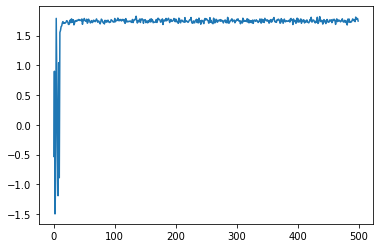

<Figure size 432x288 with 0 Axes>

In [23]:
print("Cumul récompenses : ", np.sum(Ggreedy))
print("Cumul Regret      : ", np.sum(regret))

plt.figure()
plt.plot(Ggreedy)
plt.figure()